## **Solutions to Week 8 Recitation Problems**

Today we will work on making some plots and drawing conclusions - we will also be exploring Markdown files. To begin, open a markdown file - this can be a .Rmd file (a markdown file in R studio), a google collab book, or a jupyter notebook. Formatting and presentation are important today.
- Throughout this document I will try do to as much cool text formatting as I can - double click on the text to see the code I used to do the formatting.
- You can also lookup syntax for this and much more online

As always, the first step is to open a .Rmd file in R studio: go to `File` > `New File` > `R Markdown ...` (you can also check out `R HTML` if you are interested, its similar but creates a web page). Otherwise, google collab and Jupyter notebooks are already markdown files, you can just open them. We will also want to import `tidyverse` in order to make some interesting plots.



In [3]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



#1) Pick either a dataset we have used so far in recitation or a dataset pre-loaded in R that you find interesting.

I will use the COVID-19 dataset from last week's recitation. First I import the dataset, and run some basic diagnostics. The purpose of the diagnostics is to discover whether or not I have full data, if there are any missing values or incorrect values, and to find out what levels I have in each variable.

In [4]:
covid <- read_csv("/content/owid-covid-data.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  iso_code = col_character(),
  continent = col_character(),
  location = col_character(),
  date = col_date(format = ""),
  `Death Rate` = col_logical(),
  `Death Pct` = col_logical(),
  new_tests = col_logical(),
  total_tests = col_logical(),
  total_tests_per_thousand = col_logical(),
  new_tests_per_thousand = col_logical(),
  new_tests_smoothed = col_logical(),
  new_tests_smoothed_per_thousand = col_logical(),
  tests_per_case = col_logical(),
  positive_rate = col_logical(),
  tests_units = col_logical()
)

See spec(...) for full column specifications.

Warning message:
“165427 parsing failures.
 row                      col           expected          actual                           file
1332 new_tests                1/0/T/F/TRUE/FALSE 75              '/content/owid-covid-data.csv'
1332 total_tests              1/0/T/F/TRUE/FALSE 75              '/content/owid-covid-data.csv'
1332 total_tests_per_thousand 1/0/

The first diagnostics I will run is to view the dataset. I can do this with:
1.  `view(covid)` or with `head(covid)` and
`tail(covid)`. 
2. I would also like to use `str(covid)`. From these I can check the number and names of variables, the data types, the number of rows, and some sample values.

In [7]:
view(covid) #note this command only works in R studio
head(covid)
locations <- covid %>% count(location)
#print(locations)
dates <- covid %>% count(date)
#pritn(dates)

iso_code,continent,location,date,Death Rate,Death Pct,total_cases,new_cases,new_cases_smoothed,total_deaths,⋯,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
<chr>,<chr>,<chr>,<date>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ABW,North America,Aruba,2020-03-13,NA,NA,2,2,NA,0,⋯,35973.78,NA,NA,11.62,NA,NA,NA,NA,76.29,NA
ABW,North America,Aruba,2020-03-19,NA,NA,NA,NA,0.286,NA,⋯,35973.78,NA,NA,11.62,NA,NA,NA,NA,76.29,NA
ABW,North America,Aruba,2020-03-20,NA,NA,4,2,0.286,0,⋯,35973.78,NA,NA,11.62,NA,NA,NA,NA,76.29,NA
ABW,North America,Aruba,2020-03-21,NA,NA,NA,NA,0.286,NA,⋯,35973.78,NA,NA,11.62,NA,NA,NA,NA,76.29,NA
ABW,North America,Aruba,2020-03-22,NA,NA,NA,NA,0.286,NA,⋯,35973.78,NA,NA,11.62,NA,NA,NA,NA,76.29,NA
ABW,North America,Aruba,2020-03-23,NA,NA,NA,NA,0.286,NA,⋯,35973.78,NA,NA,11.62,NA,NA,NA,NA,76.29,NA


This data was downloaded from the website [Our World in Data (OWID)](https://ourworldindata.org/coronavirus-source-data) and further information on variables and data collection process is available there. It looks like there are 212 countries included in this dataset each with a different number of observations. There are 281 dates between 12.31.2019 and 10.06.2020.

#2) Data diagnostics: make a histogram of at least one variable. What does this information tell you? Draw conclusions - type up your conclusions in a text cell next to your plot.

I am interested in the distribution of "changes in number of cases." Essentially I want to know how often were cases increasing by a lot versus increasing by a little. This will give a sense of how fast the virus spreads on average.

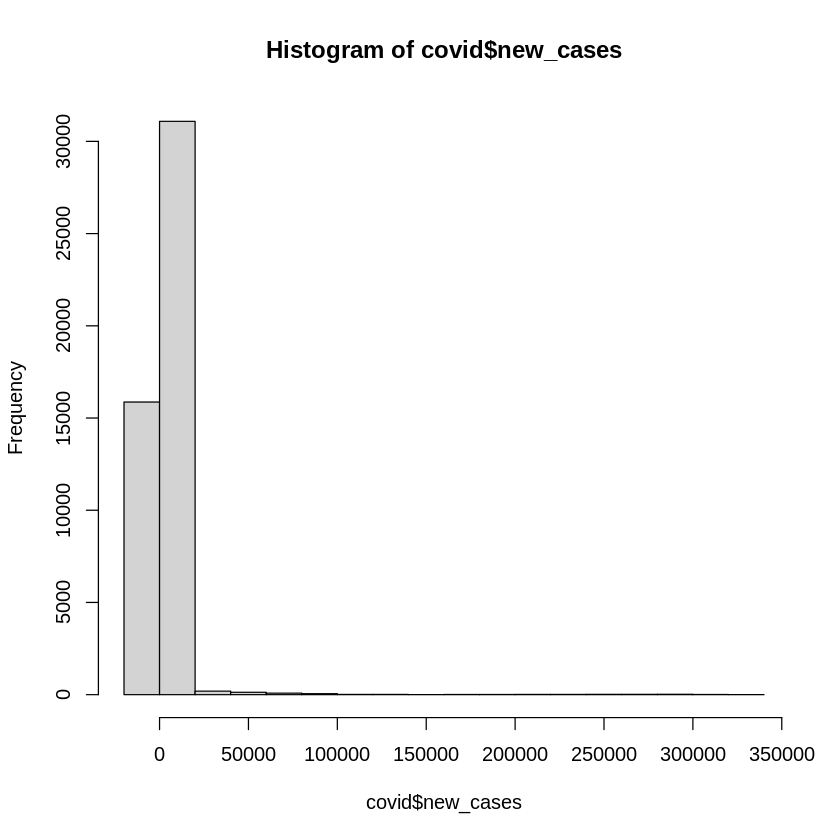

In [28]:
hist(covid$new_cases)

Looks like the vast majority of new increases in total cases are small but a few were quite large jumps. However, this could be misleading since most of the values are 0, which could represent time before the virus was present. This is good to know - if we want to compare cases in different countries we will need to account for when the virus hit each country.

#3) Data exploration: make at least one bivariate plot. What does this information tell you? Draw conclusions - type up your conclusions in a text cell below near you plot.

A bivariate plot is one that compares two variables (whereas a histogram represnts only one varaible from your data).

Lets look at the death rate over time. To do this we can either use the `death rate` or `death percent` variables already in the data or we can calculate it ourselves using the `population` varaible.

In [47]:
covid_3 <- covid_2 %>% mutate(calculated_death_rate = 100*total_deaths/population) %>%
  filter(location %in% c("United States","Italy","Iran"))

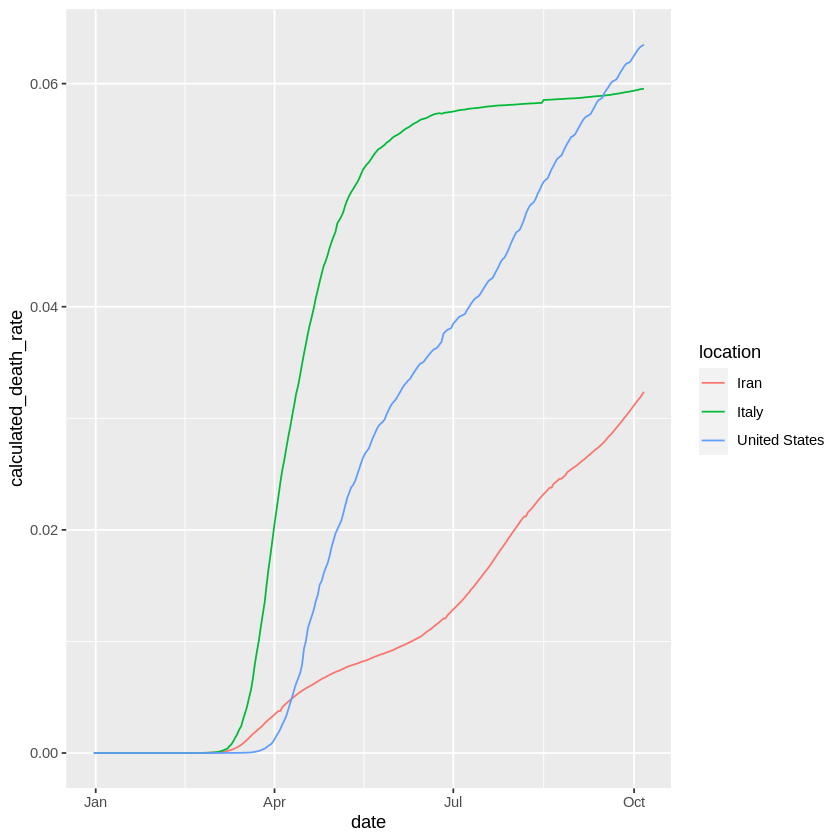

In [48]:
ggplot(covid_3)+geom_line(aes(x=date, y=calculated_death_rate,color=location))

This is very interesting. First of all we can see that the virus did hit the United States well after it hit Italy and Iran since the blue line spikes almost half a month after the green and red lines. 

Additionally, it looks like the virus becomes strikingly more deadly very quickly. This is interesting since it is not what might be expected - generally a virus doesn't become drastically more or less deadly within a span of months. This is more likely because the number of positive cases is approximated by the number of positive tests. Since there were very few tests in the beginning, we are likely to see a very high death rate (almost 1) when there are few tests. If this is true, this does not mean the virus became more deadly, only that we started testing more. We could make a plot of tests over time to investigate this.

Lastly, the death rate in Italy topped out at around 0.06% of the population by July whereas the death rate in the US appears to continue to rise. Since the US was much slower to adopt widespread testing than Italy, this could again be an artifact of the rate of testing. 